# HANDWRITTEN DIGIT RECOGNITION USING THE MODIFIED NATIONAL INSTITUTE OF STANDARDS AND TECHNOLOGY (MNIST) DATASET
By Nnamdi Nwankwo

# Importing necessary libraries

In [315]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

# Loading and preprocessing the MNIST dataset

In [316]:
mnist = tf.keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [317]:
X_train.shape

(60000, 28, 28)

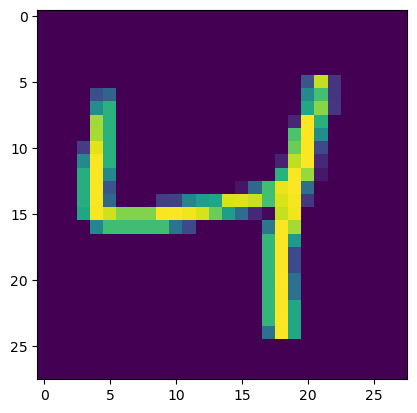

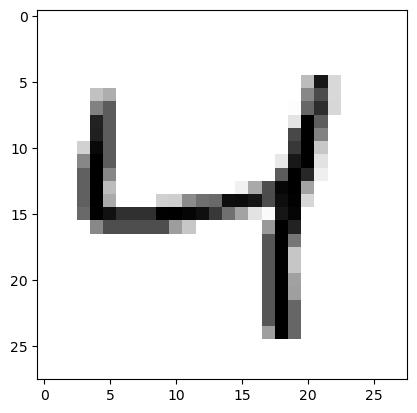

In [318]:
#Checking to know what the data looks like
plt.imshow(X_train[2])
plt.show()

#changing the configuration
plt.imshow(X_train[2], cmap = plt.cm.binary)

In [319]:
#checking the values of each pixel
print(X_train[2])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  67 232  39   0   0   0   0   0]
 [  0   0   0   0  62  81   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 120 180  39   0   0   0   0   0]
 [  0   0   0   0 126 163   0   0   0   0   0   0   0   0   0   0   0   0
    0   2 153 210  40   0   0   0   0   0]
 [  0   0   0   0 220 163   0   0   0   0   0   0   0   0   0   

In [320]:
#Normalizing the data as the images are in grey level 0 to 255
X_train =tf.keras.utils.normalize (X_train, axis =1)
X_test =tf.keras.utils.normalize (X_test, axis =1)


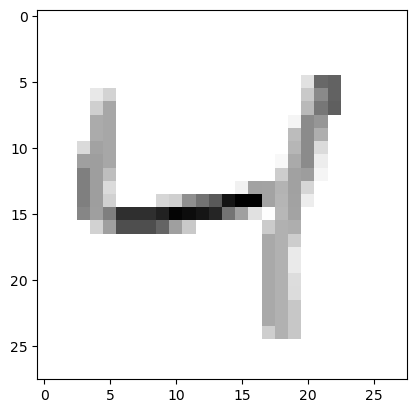

In [321]:
plt.imshow(X_train[2], cmap=plt.cm.binary)

In [322]:
print(X_train[2])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [323]:
print(Y_train[2])

4


In [324]:
X_train=np.array(X_train).reshape(-1, 28,28,1)
X_test=np.array(X_test).reshape(-1, 28,28,1)

In [325]:
X_train.shape

(60000, 28, 28, 1)

# Building the Deep Neural Network model

In [326]:
#creating a neural network
model =Sequential()

###Activation function(relu) for introducing non-linearity in the model(removing values < zero and keeping values >0)
#fully connected layer
##flatten(Converting to I dimension)
###dense(specifying the  number of units)
model.add(Conv2D(64, (3,3), input_shape=X_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))
          
model.add(Dense(64))
model.add(Activation("relu"))

#last fully connected layer(having 10 units to represent the individual units)
#softmax Activation function for class probabilities
model.add(Dense(10))
model.add(Activation('softmax'))

In [327]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 activation_12 (Activation)  (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_13 (Activation)  (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                 

In [328]:
#Total training samples
print(len(X_train))

60000


# Compiling and Training the Model

In [329]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [330]:
model.fit(X_train, Y_train, epochs=5, validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 81s 60ms/step - loss: 0.3087 - accuracy: 0.9017 - val_loss: 0.1098 - val_accuracy: 0.9659
Epoch 2/5
1313/1313 [==============================] - 77s 59ms/step - loss: 0.0940 - accuracy: 0.9713 - val_loss: 0.0842 - val_accuracy: 0.9741
Epoch 3/5
1313/1313 [==============================] - 77s 58ms/step - loss: 0.0697 - accuracy: 0.9780 - val_loss: 0.0743 - val_accuracy: 0.9782
Epoch 4/5
1313/1313 [==============================] - 77s 59ms/step - loss: 0.0551 - accuracy: 0.9825 - val_loss: 0.0580 - val_accuracy: 0.9816
Epoch 5/5
1313/1313 [==============================] - 78s 60ms/step - loss: 0.0437 - accuracy: 0.9864 - val_loss: 0.0877 - val_accuracy: 0.9736


In [331]:
#saving the model
model.save('handwritten.model')

INFO:tensorflow:Assets written to: handwritten.model\assets


INFO:tensorflow:Assets written to: handwritten.model\assets


In [332]:
#loading the model
model=tf.keras.models.load_model('handwritten.model')

# Evaluating the model on the 10,000 test set

In [333]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(f'Test accuracy on test samples: {test_acc}')
print(f'Test loss on test samples: {test_loss}')

313/313 [==============================] - 5s 16ms/step - loss: 0.0828 - accuracy: 0.9765
Test accuracy on test samples: 0.9764999747276306
Test loss on test samples: 0.08279421180486679


# In order to check the answer, lets write a letter hand-written digit using paint app, load them and check 

In [334]:
predictions=model.predict([X_test])

313/313 [==============================] - 5s 16ms/step


In [335]:
print(predictions)

[[8.08610068e-09 6.21419588e-07 3.48330250e-05 ... 9.99962211e-01
  1.04056028e-07 2.48363932e-07]
 [2.63087513e-05 3.42565272e-06 9.99927998e-01 ... 5.14188150e-06
  2.15744894e-05 1.10790053e-08]
 [4.62375601e-06 9.99805868e-01 2.45635852e-06 ... 7.35555568e-06
  4.12498557e-05 6.52556423e-07]
 ...
 [5.51903211e-11 9.49855661e-09 5.70087554e-11 ... 3.16269833e-09
  3.53593177e-09 5.21423154e-08]
 [2.13864769e-05 1.48048462e-08 8.30476188e-10 ... 1.77930629e-10
  3.23229330e-07 1.52771644e-08]
 [2.56622996e-04 7.12443660e-09 1.58498569e-05 ... 3.37488128e-11
  1.01577854e-04 3.43758279e-06]]


In [336]:
print(np.argmax(predictions[0]))

7


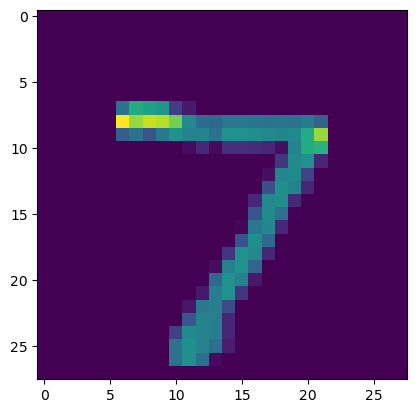

In [337]:
plt.imshow(X_test[0])

In [338]:
print(np.argmax(predictions[15]))

5


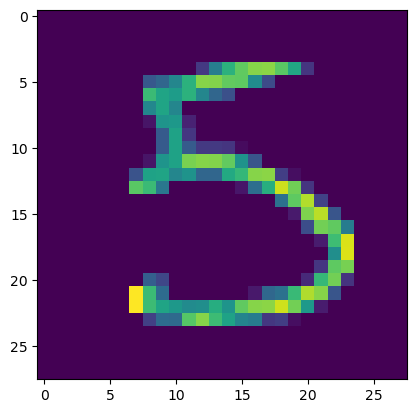

In [339]:
plt.imshow(X_test[15])

In [340]:
img=cv2.imread(r"C:\Users\CELEBOBO COMPUTERS\Desktop\numbers\number4.png")

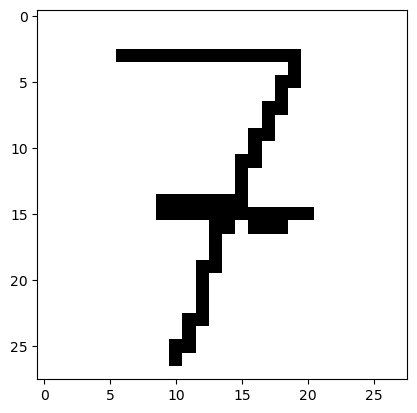

In [341]:
plt.imshow(img)

In [342]:
 img.shape

(28, 28, 3)

In [343]:
img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [344]:
img.shape

(28, 28)

In [345]:
img=cv2.resize(img, (28,28), interpolation=cv2.INTER_AREA)

In [346]:
img.shape

(28, 28)

In [347]:
img =tf.keras.utils.normalize (img, axis =1)
img.shape

(28, 28)

In [348]:
img=np.array(img).reshape(-1,28,28,1)

In [349]:
img.shape

(1, 28, 28, 1)

In [350]:
predictions=model.predict(img)

1/1 [==============================] - 0s 185ms/step


In [351]:
print(f"This number is probably a {np.argmax(predictions)}")

This number is probably a 0


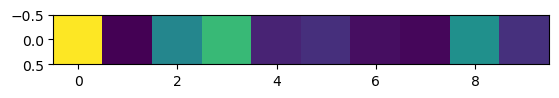

In [352]:
plt.imshow(predictions)